# Multiple Linear Regression of House prices

Code Created by Luis Enrique Acevedo Galicia

Date: 2019-09-03

Here, I present a simple and easy way to create a multiple linear regression. The file Data_prices_year.csv contains data of prices and year vs house area.


# The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import statsmodels.api as sm

# The data 

In [2]:
data = pd.read_csv('Data_prices_year.csv')
data.head()

,price,Area,year
0,468631.288,1289.18,2016
1,457166.056,1315.44,2010
2,563255.672,977.58,2019
3,802514.216,3012.50,2016
4,917351.512,2553.92,2010


Verifying that data is completed

In [3]:
data[pd.isnull(data['year'])]

,price,Area,year


learning about this data set

In [4]:
data.describe()

,price,Area,year
count,1.000000e+02,100.000000,100.000000
mean,5.845819e+05,1709.048400,2013.600000
std,1.541035e+05,595.883901,4.729021
min,3.085673e+05,962.500000,2007.000000
25%,4.685633e+05,1289.660000,2010.000000
50%,5.611844e+05,1395.810000,2016.000000
75%,6.714504e+05,2061.645000,2019.000000
max,1.001365e+06,3688.020000,2019.000000


# The Regression

Text(0.5, 0, 'price')

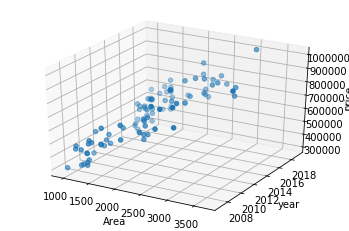

In [6]:
# The dependent variable (y) is the price
y = data ['price']
# The independent variableS (x) are the Area and the year
x_1 = data[ ['Area','year']]

#Plot this data
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl

fig = plt.figure()
ax = plt.axes(projection='3d')

# three-dimensional scattered points
ax.scatter3D(x_1.Area, x_1.year, y);
ax.set_xlabel('Area')
ax.set_ylabel('year')
ax.set_zlabel('price')


In [7]:
#The regression model

# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x_1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
Result = sm.OLS(y,x).fit()
#analyze the model
Result.summary()

/home/bwayne/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Sat, 09 Feb 2019   Prob (F-statistic):           2.77e-32
Time:                        17:05:36   Log-Likelihood:                -1261.0
No. Observations:                 100   AIC:                             2528.
Df Residuals:                      97   BIC:                             2536.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.155e+07   3.17e+06     -3.647      0.000   -1.78e+07   -5.27e+06
Area         227.7009     12.474     18.254      0.000     202.943     252.458
year        5833.5707   1571.791      3.711      0.000    2714.000    8953.141
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     1.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# The results

Text(0.5, 0, 'price')

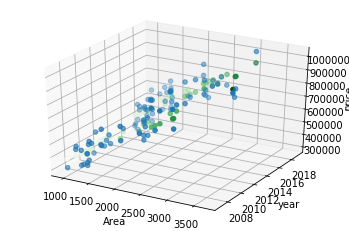

In [8]:
# The same plot

fig = plt.figure()
ax = plt.axes(projection='3d')

# The regression equation,from previous model
y_hat = 227.7009*x_1.Area + 5833.5707*x_1.year -1.155e+07
ax.scatter3D(x_1.Area, x_1.year, y_hat, c=y_hat, cmap='Greens');

ax.scatter3D(x_1.Area, x_1.year, y);
ax.set_xlabel('Area')
ax.set_ylabel('year')
ax.set_zlabel('price')
